IAMSI -- 2022-2023
--------
*&copy; Christophe Marsala.*

# TME 8 : Arbres de décision

<font color="RED" size="+1">**[Q]**</font> **Indiquer dans la boîte ci-dessous vos noms et prénoms:**

*Bouchouchi Nour*  
*Dijksman Ella*

<font color="RED" size="+1">**[Q]**</font> **Renommer ce notebook**

Ajouter à la suite de <tt>tme8</tt> les noms des membres du binômes séparés par un tiret.

## Présentation

### Chargement de librairies utiles

Avant de commencer, exécutez la boîte suivante qui permet d'utiliser ensuite les librairies Python qui vont être utiles dans ce notebook.

In [1]:
# Importation des librairies standards:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  


### Entropie et gain d'information

On note $\{c_1, c_2,..., c_k\}$, l'ensemble des classes possibles.

Dans le cours, la mesure de désordre présentée utilise, pour toute valeur $c$ de la classe le ratio $\frac{|Y(c)|}{|Y|}$ qui correspond à la probabilité de la classe $c$ parmi $Y$.
On note dans ce qui suit $p_1$ la probabilité de la classe $c_1$ parmi $Y$, etc. 

Ainsi, on a $P=(p_1, p_2,..., p_k)$ la distribution de probabilités sur les classes ainsi définies.

L'**entropie de Shannon** de la distribution $P$ est donnée par:

$ H_S(P) = -\sum_{i=1}^{k} p_i \log_k(p_i)$

Le logarithme utilisé est le logarithme en base $k$ afin d'obtenir une valeur normalisée de l'entropie. 

Pour ce qui suit, une *distribution de probabilités* est représentée par une **liste** Python $P=[p_1,...,p_k]$ de valeurs réelles telle que
* pour tout $i=1,..., k$ : $0 \leq p_i \leq 1$
* $\sum_{i=1}^{k}p_i = 1$


<font color="RED" size="+1">**[Q]**</font> Ecrire la fonction <code>shannon()</code> qui, étant donné une distribution de probabilités $P$, rend la valeur de $H_S(P)$, l'entropie de Shannon de $P$.

In [108]:
def shannon(P):
    if len(P)== 1:
        return 0.0
    H = 0
    for p in P : 
        if p != 0 : 
            H -= p*np.log(p)/np.log(len(P))
    return H

In [109]:
# Exemples d'utilisation:
print("P=[1] : ", shannon([1]))
print("P=[1,0] : ", shannon([1, 0]))
print("P=[0.25, 0.25, 0.25, 0.25] : ", shannon([0.25, 0.25, 0.25, 0.25]))
print("P=[0.7, 0.1, 0.2, 0.0] : ", shannon([0.7, 0.1, 0.2, 0.0]))
print("P=[1.0/3, 2.0/3] : ", shannon([1.0/3, 2.0/3]))

P=[1] :  0.0
P=[1,0] :  0.0
P=[0.25, 0.25, 0.25, 0.25] :  1.0
P=[0.7, 0.1, 0.2, 0.0] :  0.5783898247235197
P=[1.0/3, 2.0/3] :  0.9182958340544896


<font color="RED" size="+1">**[Q]**</font> Tracer, à l'aide de la fonction plot, la courbe donnant la valeur de <code>shannon([p, 1-p])</code> en fonction de <code>p</code>.

In [14]:
import matplotlib.pyplot as plt

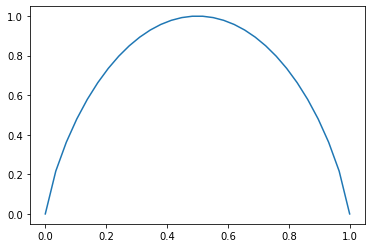

In [20]:
x = np.linspace(0, 1, 30)
y = [shannon([p,1-p]) for p in x]
plt.plot(x,y)
plt.show()

Afin de réaliser des premiers essais, on charge la base sur les élections vue dans le cours. Pour cela, on utilise la librairie Pandas qui permet de charger un dataframe.


In [26]:
# Chargement des fichiers de données :

elections_df = pd.read_csv("data/elections.csv")
elections_df

# remarque: La classe est le Label

,Adresse,Majeur?,Nationalite,Label
0,Paris,oui,Francais,1
1,Paris,non,Francais,-1
2,Montpellier,oui,Italien,1
3,Paris,oui,Suisse,-1
4,Strasbourg,non,Italien,-1
5,Strasbourg,non,Francais,-1
6,Strasbourg,oui,Francais,1
7,Montpellier,oui,Suisse,-1


In [27]:
# Pour ne garder que le nom des variables de description (et pas la classe):
# sous la forme d'une liste:

elections_noms = [nom for nom in elections_df.columns if nom != 'Label']
elections_noms

['Adresse', 'Majeur?', 'Nationalite']

In [28]:
# Sélection de valeurs:
elections_df[elections_df['Adresse']=='Paris']

,Adresse,Majeur?,Nationalite,Label
0,Paris,oui,Francais,1
1,Paris,non,Francais,-1
3,Paris,oui,Suisse,-1


<font color="RED" size="+1">**[Q]**</font> Donner les instructions permettant de calculer l'entropie de cette base relativement à la colonne `Label`.

**Remarque :** la fonction numpy `unique` permet d'obtenir les valeurs ainsi que leur décompte (cf. la documentation en ligne).

In [43]:
def entropie_relative(attribut):
    valeurs_distinctes, nb_valeurs = np.unique(attribut, return_counts=True)
    nb_val_tot = np.sum(nb_valeurs)
    H = shannon(nb_valeurs/nb_val_tot)
    return valeurs_distinctes, nb_valeurs, H

valeurs_distinctes, nb_valeurs, H = entropie_relative(elections_df["Label"])
print("Valeurs différentes dans la colonne Label : ", valeurs_distinctes)
print("Décompte de chaque valeur(respectivement) : ", nb_valeurs)
print("Entropie correspondante : ", H)


Valeurs différentes dans la colonne Label :  [-1  1]
Décompte de chaque valeur(respectivement) :  [5 3]
Entropie correspondante :  0.954434002924965


In [39]:
elections_df[elections_df['Adresse']=='Paris']

,Adresse,Majeur?,Nationalite,Label
0,Paris,oui,Francais,1
1,Paris,non,Francais,-1
3,Paris,oui,Suisse,-1


<font color="RED" size="+1">**[Q]**</font> Donner les instructions permettant de calculer le gain d'information obtenu en considérant individuellement chacun des 3 attributs de description.

In [117]:
def gain_info(attribut):
    liste_att = [nom for nom in elections_df.columns if nom != 'Label']
    _,_,Hlabel = entropie_relative(elections_df["Label"])
    for att in liste_att : 
        print("Pour l'attribut ", att)
        valeurs_distinctes, nb_valeurs, H = entropie_relative(elections_df[att])
        
        entr_rel = []
        for i,v in enumerate(valeurs_distinctes) :
            print(f"\tPour {v} ({nb_valeurs[i]} exemples)")
            b = elections_df[elections_df[str(att)]==str(v)]
            valeurs_distinctes2, nb_valeurs2, H2 = entropie_relative(b["Label"])
            print("\t\tValeurs différentes dans la colonne Label : ", valeurs_distinctes2)
            print("\t\tDécompte de chaque valeur(respectivement) : ", nb_valeurs2)
            print("\t\tEntropie correspondante : ", H2)
            entr_rel.append(H2)
        
        avg = np.average(entr_rel, weights = nb_valeurs)
        print("Entropie de la classe relativement à cet attribut : ", avg)
        print(f"--> gain d'information : {Hlabel} - {avg} = {Hlabel-avg}")

In [118]:
gain_info(elections_df["Label"])

Pour l'attribut  Adresse
	Pour Montpellier (2 exemples)
		Valeurs différentes dans la colonne Label :  [-1  1]
		Décompte de chaque valeur(respectivement) :  [1 1]
		Entropie correspondante :  1.0
	Pour Paris (3 exemples)
		Valeurs différentes dans la colonne Label :  [-1  1]
		Décompte de chaque valeur(respectivement) :  [2 1]
		Entropie correspondante :  0.9182958340544896
	Pour Strasbourg (3 exemples)
		Valeurs différentes dans la colonne Label :  [-1  1]
		Décompte de chaque valeur(respectivement) :  [2 1]
		Entropie correspondante :  0.9182958340544896
Entropie de la classe relativement à cet attribut :  0.9387218755408671
--> gain d'information : 0.954434002924965 - 0.9387218755408671 = 0.015712127384097996
Pour l'attribut  Majeur?
	Pour non (3 exemples)
		Valeurs différentes dans la colonne Label :  [-1]
		Décompte de chaque valeur(respectivement) :  [3]
		Entropie correspondante :  0.0
	Pour oui (5 exemples)
		Valeurs différentes dans la colonne Label :  [-1  1]
		Décompte de c

<font color="RED" size="+1">**[Q]**</font> Quel est l'attribut le plus intéressant pour prédire la classe ?

<font color='BLUE'>
    L'attribut le plus intéressant est celui qui maximise le gain d'information, c'est-à-dire l'attribut "Majeur?".
</font>

## Utilisation de scikit-learn

La librairie Python scikit-learn fournit un ensemble de fonctions pour utiliser des algorithmes d'apprentissage, notamment l'algorithme de construction d'arbres de décision.

La documentation est disponible sur la page :
- http://scikit-learn.org/stable/index.html

### Chargement d'une base d'apprentissage prédéfinie

Scikit-learn est fournie avec quelques bases d'apprentissage classiques comme les Iris de Fischer.

Exécuter les 2 commandes suivantes permettant de charger la base des Iris dans la session:

In [119]:
from sklearn.datasets import load_iris
base_iris = load_iris()

En vous aidant de la documentation de l'API: 
- http://scikit-learn.org/stable/datasets/index.html#datasets

<font color="RED" size="+1">**[Q]**</font> Donnez dans les boîtes suivantes les commandes 

- pour afficher le nom des attributs de description:

In [122]:
base_iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

- pour afficher les descriptions de l'ensemble des exemples de la base:

In [125]:
print("Quelques descriptions (les 10 premières):")
base_iris.data[:10]

Quelques descriptions (les 10 premières):


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

- pour afficher les noms des classes:

In [127]:
base_iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

- pour afficher les valeurs des classes pour l'ensemble des exemples de la base:

In [130]:
base_iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

<font color="RED" size="+1">**[Q]**</font> Donner une instruction Python permettant de savoir combien d'exemples contient la base.

In [131]:
print(f"Il y a en tout {len(base_iris.target)} exemples")

Il y a en tout 150 exemples


<font color="RED" size="+1">**[Q]**</font> Ecrire la fonction affiche_exemple() qui prend en argument une base d'exemples et un  entier $i$ et qui affiche *joliment* l'exemple d'indice $i$ de la base, sur le format donné en exemple ci-dessous.
On fait l'hypothèse que l'indice est correct pour la base donnée.

In [141]:
def affiche_exemple(base, i):
    print(f"Exemple {i} :")
    feature_names = base_iris.feature_names
    val = base_iris.data[i]
    for j in range(len(val)):
        print(f"\t{feature_names[j]} : {val[j]}")

In [143]:
affiche_exemple(base_iris,0)

Exemple 0 :
	sepal length (cm) : 5.1
	sepal width (cm) : 3.5
	petal length (cm) : 1.4
	petal width (cm) : 0.2


In [144]:
affiche_exemple(base_iris,50)

Exemple 50 :
	sepal length (cm) : 7.0
	sepal width (cm) : 3.2
	petal length (cm) : 4.7
	petal width (cm) : 1.4


In [145]:
affiche_exemple(base_iris,149)

Exemple 149 :
	sepal length (cm) : 5.9
	sepal width (cm) : 3.0
	petal length (cm) : 5.1
	petal width (cm) : 1.8


### Constitution d'une base d'apprentissage et d'une base de test

Pour mettre au point et vérifier l'efficacité de l'apprentissage du modèle, il est nécessaire de posséder deux ensembles disjoints d'exemples:
- l'ensemble des exemples d'apprentissage servant à construire l'arbre de décision (la base d'apprentissage);
- l'ensemble des exemples servant à tester l'arbre construit (la base de test).

Dans ce qui suit, on construit une base d'apprentissage en prenant 90 exemples de la base des iris (on s'arrange pour que la distribution des classes soit respectée en prenant les premiers 30 exemples de chaque classe) pour la base d'apprentissage (nommée *app_data*, avec les classes correspondantes dans *app_target*) et 60 exemples pour la base de test (nommée *test_data*, avec les classes correspondantes *test_target*).

In [146]:
# On utilise ici le fait que dans la base chargée en mémoire: 
#     - les 50 premiers exemples (indices 0 à 49) sont de la classe 0
#     - les 50 exemples suivants (indices 50 à 99) sont de la classe 1
#     - les 50 exemples suivants (indices 100 à 150) sont de la classe 2

# préparation: détermination des indices pour la séparation des données
ind_app_1 = range(0,30)     # les 30 descriptions des premiers exemples de la base (classe 0)
ind_tes_1 = range(30,50)    # les 20 descriptions des exemples restants de la classe 0 

ind_app_2 = range(50,80)    # les 30 premiers exemples de la classe 1
ind_tes_2 = range(80,100)   # les 20 exemples restants de la classe 1

ind_app_3 = range(100,130)  # les 30 premiers exemples de la classe 2
ind_tes_3 = range(130,150)  # les 20 exemples restants de la classe 2 

# constitution de la base d'apprentissage
#   1) on duplique les descriptions 
data_1= base_iris.data[ind_app_1].copy()
data_2= base_iris.data[ind_app_2].copy()
data_3= base_iris.data[ind_app_3].copy()
app_data = np.concatenate((data_1,data_2,data_3), axis=0)

#   2) on duplique identiquement les classes associées
target_1= base_iris.target[ind_app_1].copy()
target_2= base_iris.target[ind_app_2].copy()
target_3= base_iris.target[ind_app_3].copy()
app_target= np.concatenate((target_1,target_2,target_3), axis=0)

# constitution de la base de test
#   1) on duplique les descriptions 
data_4= base_iris.data[ind_tes_1].copy()
data_5= base_iris.data[ind_tes_2].copy()
data_6= base_iris.data[ind_tes_3].copy()
test_data = np.concatenate((data_4, data_5, data_6), axis=0)

#   2) on duplique identiquement les classes associées
target_4= base_iris.target[ind_tes_1].copy()
target_5= base_iris.target[ind_tes_2].copy()
target_6= base_iris.target[ind_tes_3].copy()
test_target= np.concatenate((target_4,target_5,target_6), axis=0)

# tout est prêt: on a 4 variables: 2 pour la base d'apprentissage et 2 pour la base de test:
print("Base d'apprentissage : ",len(app_data)," descriptions et ", len(app_target)," labels")
print("Base de test : ",len(test_data)," descriptions et ", len(test_target)," labels")

Base d'apprentissage :  90  descriptions et  90  labels
Base de test :  60  descriptions et  60  labels


### Construction d'un arbre de décision

La construction d'un arbre de décision s'effectue grâce à la fonction *DecisionTreeClassifier* de la librairie *tree* de scikit-learn.


In [147]:
from sklearn import tree

# déclaration / initialisation d'un arbre
mon_arbre = tree.DecisionTreeClassifier()

# construction de l'arbre avec la base des Iris prise totalement
mon_arbre.fit(base_iris.data, base_iris.target)

DecisionTreeClassifier()

Cette dernière instruction renvoie une référence vers l'arbre construit. Elle fournit aussi une sortie permettant de voir les différents paramètres utilisés lors de la construction.

Le paramètre qui nous intéresse ici est le paramètre "criterion" qui définit la mesure d'information utilisée pour construire l'arbre.

Pour obtenir une construction basée sur l'entropie de Shannon, on utilise la syntaxe suivante qui précise le critère de sélection à utiliser.

In [148]:
# initialisation d'un arbre qui sera construit avec l'entropie de Shannon
autre_arbre = tree.DecisionTreeClassifier(criterion='entropy')

# construction de l'arbre avec la base d'apprentissage réduite au 90 premiers exemples:
autre_arbre.fit(app_data, app_target)

DecisionTreeClassifier(criterion='entropy')

### Affichage de l'arbre de décision construit

L'affichage s'effectue en 2 temps:
- la génération de l'arbre au format *.dot* qui est sauvegardé dans un fichier sur le disque;
- la transformation, à l'aide de la commande "dot" de linux du fichier *.dot* en fichier *.png*.


**Remarque**: éventuellement, en cas d'erreur avec l'exécution de la boîte suivante, il vous faudra sans doute mettre à jour votre version de scikit-learn.
Dans un terminal:
- lancer la commande

        pip install -U --user scikit-learn

- revenir sur ipython notebook, relancer le kernel et réexécuter les boîtes.
    
Il se peut que vous ayez aussi à faire une mise à jour de pydot:

        pip install -U --user pydot


In [149]:
#pip list

Package                       Version
----------------------------- -------------------
absl-py                       1.0.0
aiofiles                      0.8.0
aiohttp                       3.7.4.post0
aiohttp-cors                  0.7.0
alabaster                     0.7.8
alembic                       1.7.6
anyio                         3.5.0
appdirs                       1.4.4
argcomplete                   1.8.1
argh                          0.26.2
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
asgiref                       3.5.0
astroid                       2.5.1
asttokens                     2.0.5
astunparse                    1.6.3
async-generator               1.10
async-timeout                 3.0.1
atomicwrites                  1.4.0
attrs                         21.4.0
autopep8                      1.5.5
Babel                         2.9.1
backcall                      0.2.0
beautifulsoup4                4.10.0
black                         20.8b1
b

Note: you may need to restart the kernel to use updated packages.


Si vous n'avez pas la librairie pydot, décommentez la ligne suivante et exécutez-la une fois 
(remettre la ligne en commentaires ensuite)

In [150]:
#pip install -U --user pydot

^C
ERROR: Operation cancelled by user
Note: you may need to restart the kernel to use updated packages.


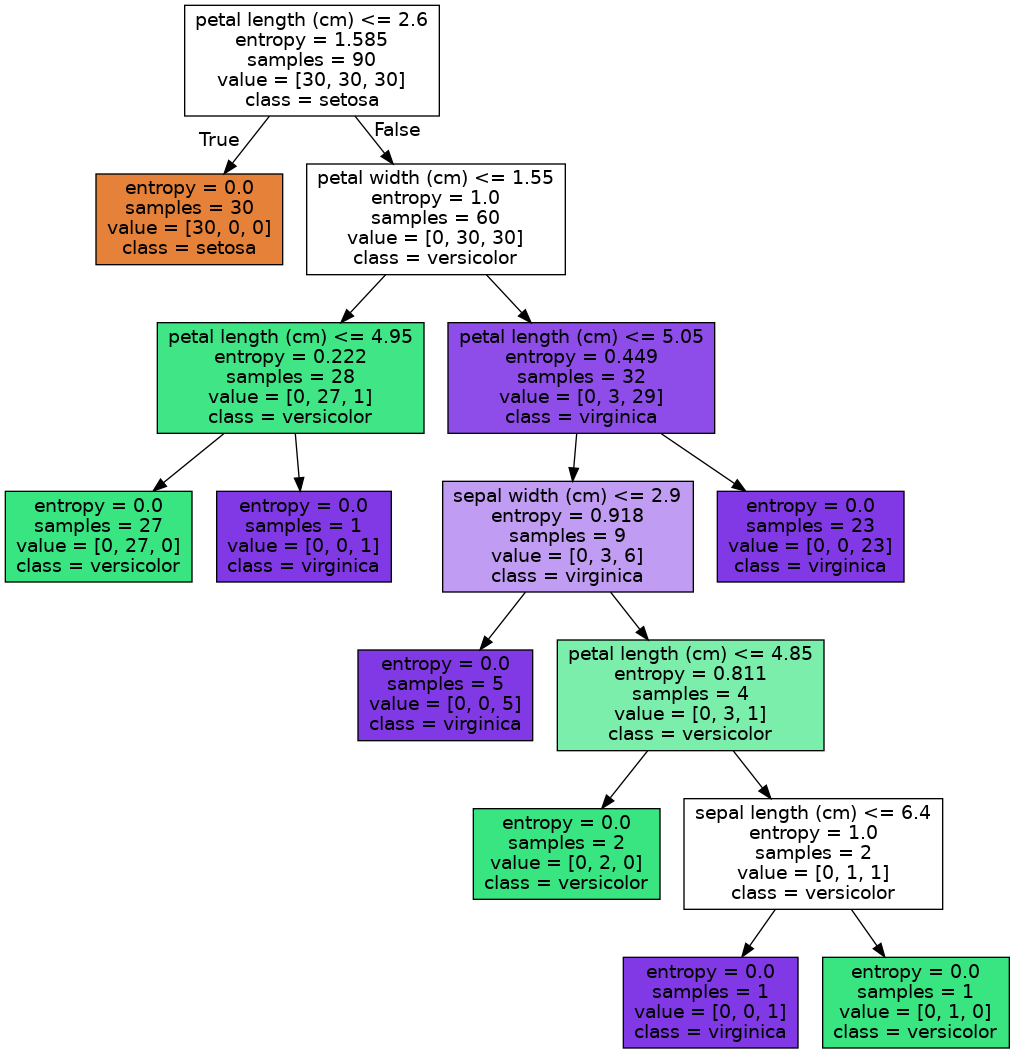

In [151]:
import io
import os
import pydot
from IPython.display import Image
    
# Nom à donner au fichier de sauvegarde:
fichierOut= "autre_arbre"
# Génération du fichier .dot représentant l'arbre:
dot_file = tree.export_graphviz(autre_arbre, out_file=fichierOut+".dot", \
                     feature_names=base_iris.feature_names, \
                     class_names=base_iris.target_names, \
                     filled=True)

# Transformation du fichier .dot en fichier .png:
os.system("dot -T png " + fichierOut+".dot -o " + fichierOut + ".png")

# à partir d'ici, vous devez avoir 2 nouveaux fichiers dans le répertoire courant

# Pour afficher l'image obtenue dans la boite Out qui suit:
Image(filename=fichierOut+'.png')

<font color="RED" size="+1">**[Q]**</font> Examiner l'arbre obtenu et représenter, sur une feuille de brouillon, la frontière de décision vue sur les 2 dimensions "petal width" et "petal length". Dans chaque zone définie par cette frontière, indiquer la ou les classes correspondantes.

### Classification avec un arbre de décision

La méthode predict() de la classe DecisionTreeClassifier() permet de réaliser la classification d'un ensemble de description (data) avec l'arbre construit.
Ainsi, la commande suivante permet d'obtenir le résultat avec l'arbre précédent de la classification de tous les exemples de la base de test que l'on a construit plus haut.

In [152]:
autre_arbre.predict(test_data)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

On rappelle que les vraies classes des exemples de test sont les suivantes:

In [153]:
test_target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

<font color="RED" size="+1">**[Q]**</font> En comparant visuellement la frontière de décision de l'arbre dans l'espace des deux dimensions "petal width" et "petal length" et les classes des données de tests, combien trouvez-vous d'exemples mal classés par l'arbre ?

<font color="RED" size="+1">**[Q]**</font>  Ecrire la fonction taux_erreur() qui prend en argument deux arrays, l'un étant le tableau des classes originales et l'autre étant le tableau des classes fournies par le classifieur, et rend le taux d'erreur de la classification réalisée.

Le taux d'erreur $t_{err}$ d'un classifieur $M$ est défini comme :
$$t_{err}(M)= \frac{n_{err}(M)}{n_{T}}$$

avec: 
- $n_{err}(M)$: nombre d'exemples de la base de test qui sont mal classés par $M$
- $n_{T}$: nombre d'exemples total de la base de test

In [156]:
def taux_erreur(orig, classif):
    nerr = np.sum(np.where(orig==classif,0,1))
    return nerr/len(orig)

In [157]:
taux_erreur(test_target,autre_arbre.predict(test_data))

0.03333333333333333

### Choix aléatoire des exemples d'apprentissage

Le taux d'erreur obtenu correspond à une base d'apprentissage construite en prenant les 30 premiers exemples de chaque classe. Pour être rigoureux, il faut réaliser l'expérience en prenant *aléatoirement* 30 exemples de chaque classe dans la base.

La fonction shuffle() de la librairie Python random permet de mélanger aléatoirement les valeurs d'une liste donnée en argument.
Par exemple, exécuter plusieurs fois les instructions de la boîte suivante:

In [158]:
import random
L= [i for i in range(0,11)]             # construction de la liste des entiers de 0 à 10
print("La liste L avant le mélange: ",L)
random.shuffle(L)                       # mélange aléatoire
print("La liste L après le mélange: ",L)

La liste L avant le mélange:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
La liste L après le mélange:  [0, 5, 2, 3, 6, 1, 4, 10, 8, 7, 9]


<font color="RED" size="+1">**[Q]**</font>  Ecrire une fonction split_aleatoire() qui prend en argument 
- 2 bases de type numpy.ndarray:
    - une base de descriptions d'exemples (par exemple celle des Iris: base_iris.data), 
    - la base des classes correspondantes (par exemple, base_iris.target), 
- un entier donnant le nombre de classes différentes existantes (par exemple, 3) 
- et un entier (nTrain)

et qui rend un quadruplet composé de 4 bases de type numpy.ndarray:
- la base train_data construite en prenant les descriptions de nTrain exemples de chaque classe choisis aléatoirement
- la base train_class correspondant à la base précédente: elle contient les classes des exemples correspondants
- la base test_data construite en prenant les descriptions restantes de chaque classe
- la base test_class correspondant à la base précédente.

**Remarque**: si la base contient, au départ, $n$ exemples de la classe $C_1$, il est possible de procéder ainsi:
- générer une liste des indices de $0$ à $n-1$;
- mélanger aléatoirement ces indices;
- retenir les nTrain premiers indices de la liste mélangée pour constituer l'ensemble train. Les indices non retenus sont utilisés pour construire test.

In [34]:
def split_aleatoire(descr, classes, i, nTrain):
    
    

In [35]:
print("Base départ: ", len(base_iris.data), " exemples")
train_data, train_class, test_data, test_class = split_aleatoire(base_iris.data,base_iris.target,3, 30)
print("Base train : ",len(train_data)," descriptions et ", len(train_class)," labels")
print("Base test : ",len(test_data)," descriptions et ", len(test_class)," labels")

Base départ:  150  exemples
Base train :  90  descriptions et  90  labels
Base test :  60  descriptions et  60  labels


<font color="RED" size="+1">**[Q]**</font> En utilisant la fonction précédente, construire 10 arbres de décisions en prenant à chaque fois 90 exemples d'apprentissage choisis aléatoirement (donc avec 30 exemples de chaque classe) et fournir le taux d'erreur obtenu sur la base de test correspondante. Calculer la moyenne et l'écart type de ce taux d'erreur.


**Remarque**: on pourra utiliser les fonctions de la librairie numpy: mean(L) et std(L) qui, pour une liste L de réels donnée, rend la valeur de la moyenne de la liste et son écart type. Par exemple:

In [36]:
L=[1.5, 1, 2.5, 3]
print("moyenne: ",np.mean(L)," et écart type: ", np.std(L))

moyenne:  2.0  et écart type:  0.7905694150420949


Construction de 10 arbres de décision avec 90 exemples pris aléatoirement:
	Moyenne du taux d'erreur:  0.05500000000000001 
	Ecart type:  0.014999999999999998


### Variation du taux d'erreur

On souhaite étudier l'influence de la taille de la base d'apprentissage sur le taux d'erreur, pour cela, on doit réaliser l'expérimentation suivante:
- séparer la base d'exemples initiale en 2 sous-bases: une base d'apprentissage $BA$ et une base de test $BT$. La base de test sert à évaluer l'arbre de décision construit, et les exemples qu'elle contient ne doivent donc jamais être utilisés dans la phase d'apprentissage.
- extraire à partir de la base d'apprentissage $BA$, plusieurs sous-bases d'apprentissage $BA_1$, $BA_2$,... contenant un nombre d'exemples différent. 
- construire un arbre de décision pour chaque base $BA_i$ et évaluer son taux d'erreur lors de la classification de $BT$.

Il est alors possible, ensuite, de tracer la courbe des variations du taux d'erreur en fonction du nombre d'exemples dans la base d'apprentissage.



<font color="RED" size="+1">**[Q]**</font> Ecrire une fonction `plusieurs_taux_erreur()` qui prend en argument 
- 2 bases de type numpy.ndarray:
    - une base de descriptions d'exemples (par exemple celle des Iris: base_iris.data), 
    - la base des classes correspondantes (par exemple, base_iris.target), 
- un entier donnant le nombre de classes différentes existantes (par exemple, 3) 
- un entier nTrain donnant le nombre d'exemples de chaque classe à utiliser pour l'apprentissage
- une liste d'entiers $[n_1, n_2,..., n_k]$ donnant des nombre d'exemples de chaque classe à prendre pour construire un arbre de décision

Après avoir séparé aléatoirement les 2 bases données en 2 parties (train et test) en prenant nTrain exemples de chaque classe pour l'apprentissage, cette fonction rend la liste $t_1, t_2,..., t_k$ tels que le taux d'erreur $t_i$ est obtenu en construisant un arbre en prenant $n_i$ exemples de la partie_train et en l'évaluant sur la partie_test.



In [39]:
Liste_nombres= [1, 3, 5, 7, 10, 15, 20, 25, 30]
Liste_taux = plusieurs_taux_erreur(base_iris.data,base_iris.target,3,35, Liste_nombres)
Liste_taux

[0.2222222222222222,
 0.2222222222222222,
 0.044444444444444446,
 0.08888888888888889,
 0.08888888888888889,
 0.06666666666666667,
 0.044444444444444446,
 0.044444444444444446,
 0.06666666666666667]

On peut ensuite tracer la courbe représentant ces variations du taux d'erreur:

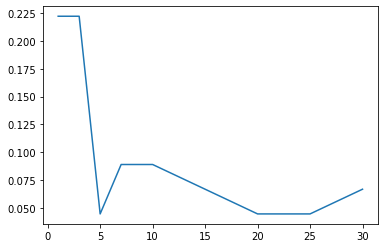

In [40]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  


plt.plot(Liste_nombres, Liste_taux)

<font color="RED" size="+1">**[Q]**</font> En utilisant la fonction précédente, tracer la courbe en réalisant 10 expérimentations et en prenant ensuite la moyenne des taux d'erreurs obtenus.

## D'autres bases

### La base "Digits"

<font color="RED" size="+1">**[Q]**</font>  Réaliser la même suite d'expériences en prenant la base "Digits" fournie avec scikit learn.

Cette base contient 1797 exemples associés à 10 classes et décrits par 64 attributs.
- contruire un arbre de décision en prenant nTrain=25 exemples de chaque classe. Afficher cet arbre.
- tracer la courbe des taux d'erreur obtenue en faisant varier nTrain de 10 à 150 (par pas de 10).

Descriptions de la base digits:
 [[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
Classes de la base digits: [0 1 2 3 4 5 6 7 8 9]
Il y a en tout 1797 exemples


### (partie facultative) Bases de l'UCI Machine Learning Repository

Ce dépôt contient un grand nombre de bases d'apprentissage disponible librement:
http://archive.ics.uci.edu/ml/datasets.html

Choisir une base d'apprentissage dans ce site, cette base doit :
- être adaptée pour une tâche de classification
- ne pas avoir de valeurs manquantes
- posséder entre 100 et 1000 exemples

<font color="RED" size="+1">**[Q]**</font> Réaliser la même suite d'expériences et commenter les résultats obtenus.